# 강화학습 1장
## 밴디트 문제

In [2]:
import numpy as np

np.random.seed(0)
rewards = []    

for n in range(1, 11) :
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(f"{n:2d} : {Q}")

 1 : 0.5488135039273248
 2 : 0.6320014351498722
 3 : 0.6222554154571294
 4 : 0.6029123573420713
 5 : 0.567060845741438
 6 : 0.5801997236289743
 7 : 0.5598265075766483
 8 : 0.6013198192273272
 9 : 0.6415801460355164
10 : 0.6157662833145425


In [7]:
np.random.seed(0)
rewards = []

Q = 0

for n in range(1, 11) :
    reward = np.random.rand()
    Q = Q + (1 / n) * (reward - Q)

    print(f"{n:2d} : {Q}")

 1 : 0.5488135039273248
 2 : 0.6320014351498722
 3 : 0.6222554154571294
 4 : 0.6029123573420713
 5 : 0.567060845741438
 6 : 0.5801997236289743
 7 : 0.5598265075766483
 8 : 0.6013198192273272
 9 : 0.6415801460355164
10 : 0.6157662833145425


In [6]:
import matplotlib.pyplot as plt

class Bandit :
    def __init__(self, arms = 10) :
        self.rates = np.random.rand(arms)

    def play(self, arm) :
        rate = self.rates[arm]

        if (rate > np.random.rand()) :
            return 1
        else :
            return 0
        
bandit = Bandit()

for i in range(3) :
    print(bandit.play(0))


1
1
1


In [7]:
bandit = Bandit()

Q = 0

for n in range(1, 11) :
    reward = bandit.play(0)
    Q += (reward + Q) / n
    print(Q)

0.0
0.0
0.0
0.25
0.5
0.5833333333333334
0.6666666666666667
0.7500000000000001
0.8333333333333335
0.9166666666666669


In [9]:
bandit = Bandit()

Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(100) :
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]

print(ns)
print(Qs)
print(bandit.rates)

[15.  9. 12.  7.  8. 12. 10.  9.  7. 11.]
[0.86666667 0.22222222 0.33333333 0.85714286 0.625      0.83333333
 0.1        0.44444444 0.71428571 1.        ]
[0.96890304 0.36316126 0.39753349 0.73868266 0.44908343 0.93728436
 0.25723349 0.38175981 0.69714162 0.8970701 ]


702


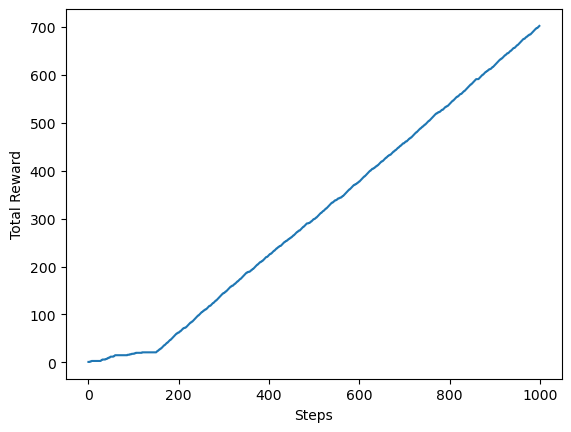

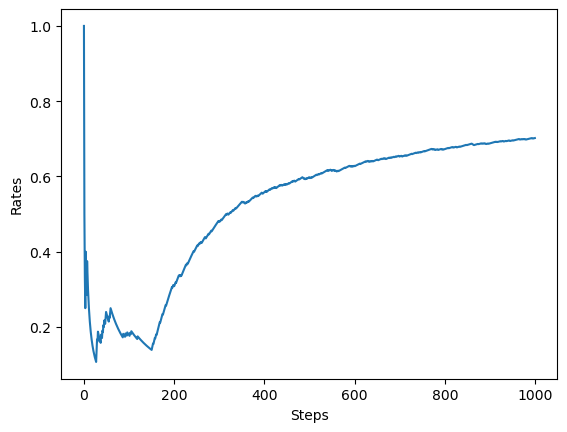

In [14]:
class Agent :
    def __init__(self, epsilon, action_size = 10) :
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward) :
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action] 
    
    def get_action(self) :
        if (self.epsilon > np.random.rand()) :
            return np.random.randint(0, len(self.Qs))
        else :
            return np.argmax(self.Qs)

steps = 1000
epsilon = 0.1
bandit = Bandit()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates = []

for step in range(steps) :
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel("Total Reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

In [ ]:
runs = 200
steps = 1000
epsilon = 0.1
total_rates = np.zeros((runs, steps))
epsilons = [x / 100 for x in range(0, 100, 1)]#[0.1, 0.3, 0.01]
avg_rates_by_epsilons = np.zeros((len(epsilons), steps))

for epsilon in epsilons :
    for run in range(runs) :
        bandit = Bandit()
        agent = Agent(epsilon)

        total_reward = 0
        total_rewards = []
        rates = []

        for step in range(steps) :
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            total_rewards.append(total_reward)
            rates.append(total_reward / (step + 1))
        
        total_rates[run] = rates

    avg_rates = np.average(total_rates, axis = 0)
    avg_rates_by_epsilons[epsilons.index(epsilon)] = avg_rates

plt.ylabel("Rates")
plt.xlabel("Steps")
for x in epsilons :
    plt.plot(avg_rates_by_epsilons[epsilons.index(x)])
plt.legend(epsilons)
plt.show()

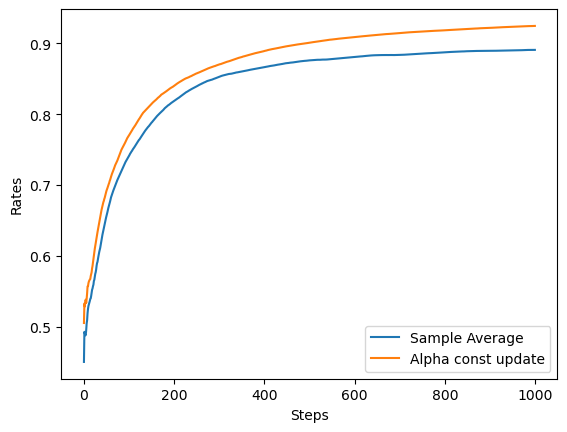

In [80]:
class NonStatBandit :
    def __init__(self, arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms)
    
    def play(self, arm) :
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)

        if (rate > np.random.rand()) :
            return 1
        else :
            return 0
        
class AlphaAgent :
    def __init__(self, epsilon, alpha, action_size = 10) :
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.alpha = alpha

    def update(self, action, reward) :
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
    
    def get_action(self) :
        if (self.epsilon > np.random.rand()) :
            return np.random.randint(0, len(self.Qs))
        else :
            return np.argmax(self.Qs)
        
runs = 200
steps = 1000
epsilon = 0.1
total_rates = np.zeros((runs, steps))
agents = ['Sample Average', 'Alpha const update']
avg_rates_by_agents = np.zeros((len(agents), steps))

for agentName in agents :
    for run in range(runs) :
        bandit = NonStatBandit()
        if (agentName == "Sample Average") :
            agent = Agent(epsilon=epsilon)
        else :
            agent = AlphaAgent(epsilon=epsilon, alpha=0.8)

        total_reward = 0
        total_rewards = []
        rates = []

        for step in range(steps) :
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            total_rewards.append(total_reward)
            rates.append(total_reward / (step + 1))
        
        total_rates[run] = rates

    avg_rates = np.average(total_rates, axis = 0)
    avg_rates_by_agents[agents.index(agentName)] = avg_rates

plt.ylabel("Rates")
plt.xlabel("Steps")
for x in agents :
    plt.plot(avg_rates_by_agents[agents.index(x)])
plt.legend(agents)
plt.show()